In [16]:
####################################################################
###    This is the PYTHON version of program 8.3 from page 302 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR epidemic (with equal births and deaths) and      #
### pulsed vaccination. Vaccination starts at time tV, after which #
### a proportion p of all susceptible individuals are vaccinated   #
### every T days            									   #
####################################################################

In [17]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*v is the rate of random vaccination.

*T is the time between vaccination pulses.

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*nu is the over-all birth set. We set ν=μ to keep the population size constant.

*mu is the per captia death rate.

*tV is the time at which the vaccination program is begun.

*S0 is the initial proportion of the population that are susceptible.

*I0 is the initial proportion of the population that are infectious.

In [18]:
beta=520/365.0;
gamma=1/7.0;
mu=1/(70*365.0);
S0=0.1;
I0=1e-4;
p=0.1;
T=2*365;
tV=30*365;
ND=MaxTime=100*365;
TS=1.0
R0=1-S0-I0
INPUT = np.hstack((S0,I0,R0))

In [19]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	Y[0]= mu - beta*V[0]*V[1] - mu*V[0]
	Y[1]= beta*V[0]*V[1] - gamma*V[1] - mu*V[1]
	Y[2]= gamma*V[1] - mu*V[2]
	return Y   # For odeint

In [20]:
#the time before vaccination
t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end+t_inc, t_inc)
#the time when vaccination starts
t_start = tV; t_end = ND+TS; t_inc = TS
t_range2 = np.arange(tV, t_end, t_inc)
#total time
TT = np.hstack((t_range1, t_range2))
#S,I,R before vaccination starts
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)
print(RES1)

[[1.00000000e-01 1.00000000e-04 8.99900000e-01]
 [1.00020980e-01 9.99584497e-05 8.99879062e-01]
 [1.00041961e-01 9.99199034e-05 8.99858119e-01]
 ...
 [1.00769165e-01 2.44494198e-04 8.98986341e-01]
 [1.00769248e-01 2.44656999e-04 8.98986095e-01]
 [1.00769308e-01 2.44819935e-04 8.98985872e-01]]


In [21]:
i=0
INPUT=RES1[-1]
RES2=np.zeros((3))
while t_range2[i]<ND:
	INPUT[2]=INPUT[2]+INPUT[0]*p;
	INPUT[0]=INPUT[0]*(1-p);
	t_range3 = np.arange(t_range2[i], t_range2[i+T], t_inc)
	tc2 = spi.odeint(diff_eqs,INPUT,t_range3)
	INPUT=tc2[-1]
	RES2= np.vstack((RES2, tc2))
	i+=T
print(len(TT))
RES2=RES2[1:,]
S = np.hstack((RES1[:,0],RES2[:,0]))
I = np.hstack((RES1[:,1],RES2[:,1]))
R = np.hstack((RES1[:,2],RES2[:,2]))
TT = np.arange(len(S))
print(len(S))


36502
36501


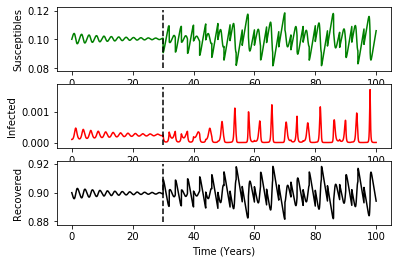

In [22]:
pl.subplot(311)
pl.plot(TT/365.0, S, '-g')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(TT/365.0, I, '-r')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Infected')
pl.subplot(313)
pl.plot(TT/365.0, R, '-k')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Recovered')
pl.xlabel('Time (Years)')

pl.show()